In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
from pmdarima import auto_arima

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


***Du doan cho bo tinh Da Nang***

In [54]:
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_DaNang_Updated.csv')
# df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df = df.reset_index()
df = df.reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   level_0   1979 non-null   int64         
 1   index     1979 non-null   int64         
 2   date      1979 non-null   datetime64[ns]
 3   pm25      1979 non-null   float64       
 4   pm10      1979 non-null   float64       
 5   o3        1979 non-null   float64       
 6   no2       1979 non-null   float64       
 7   so2       1979 non-null   float64       
 8   co        1979 non-null   float64       
 9   AQI_pm25  1979 non-null   float64       
 10  AQI_pm10  1979 non-null   float64       
 11  AQI_o3    1979 non-null   float64       
 12  AQI_no2   1979 non-null   float64       
 13  AQI_so2   1979 non-null   float64       
 14  AQI_co    1979 non-null   float64       
 15  AQI       1979 non-null   float64       
dtypes: datetime64[ns](1), float64(13), int64(2)
memory usage: 24

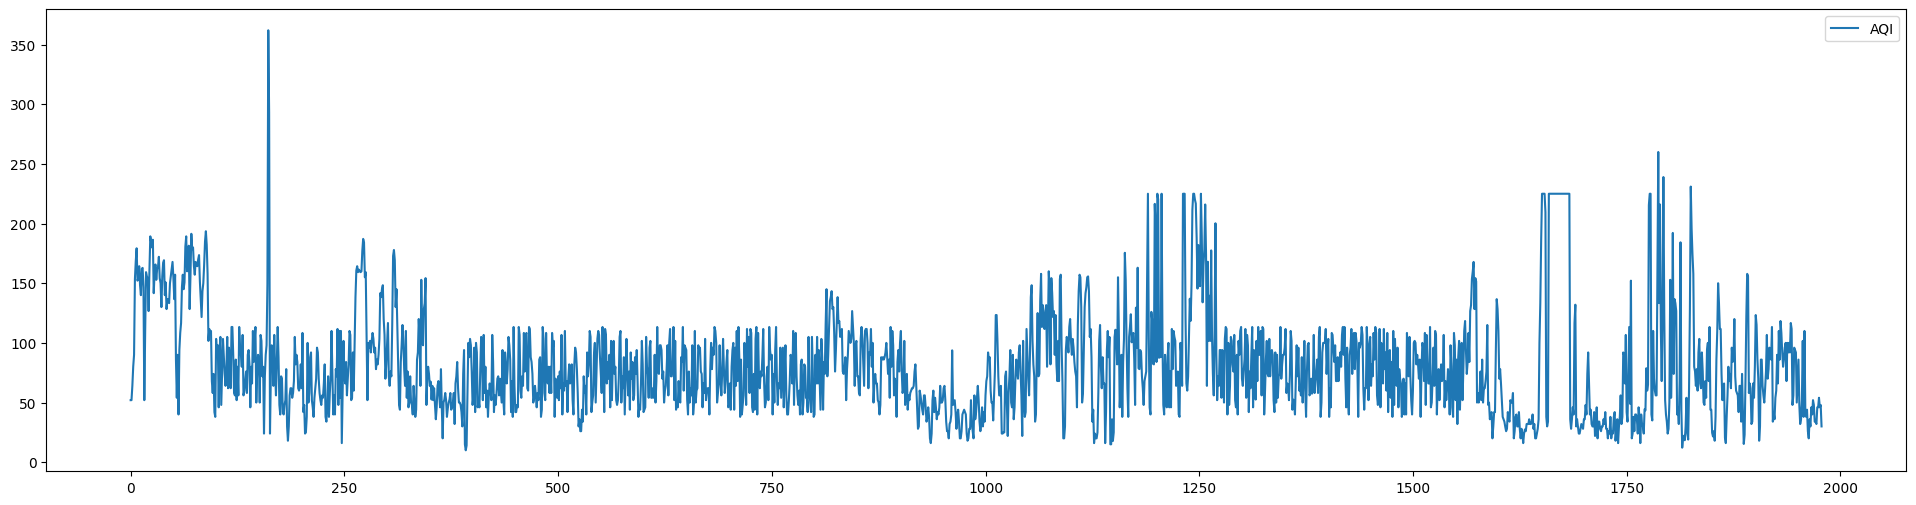

In [55]:
plt.figure(figsize=(24, 6))
plt.plot(df.index, df['AQI'])
plt.legend(['AQI'])
plt.show()

**Chia du lieu thanh 7:2:1**

In [56]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 7:3
train_size = int(0.7 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]


In [57]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13275.839, Time=2.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13615.557, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13518.965, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13401.753, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13613.559, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13272.834, Time=1.72 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13285.943, Time=1.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13271.977, Time=1.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13273.031, Time=1.91 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13429.331, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=13270.051, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=13399.754, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=13516.967, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=13271.089, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [58]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))

# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)
next_90days_pred = model.predict( n_periods=90)


In [60]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 69.89%
MAE: 37.77
RMSE: 51.06


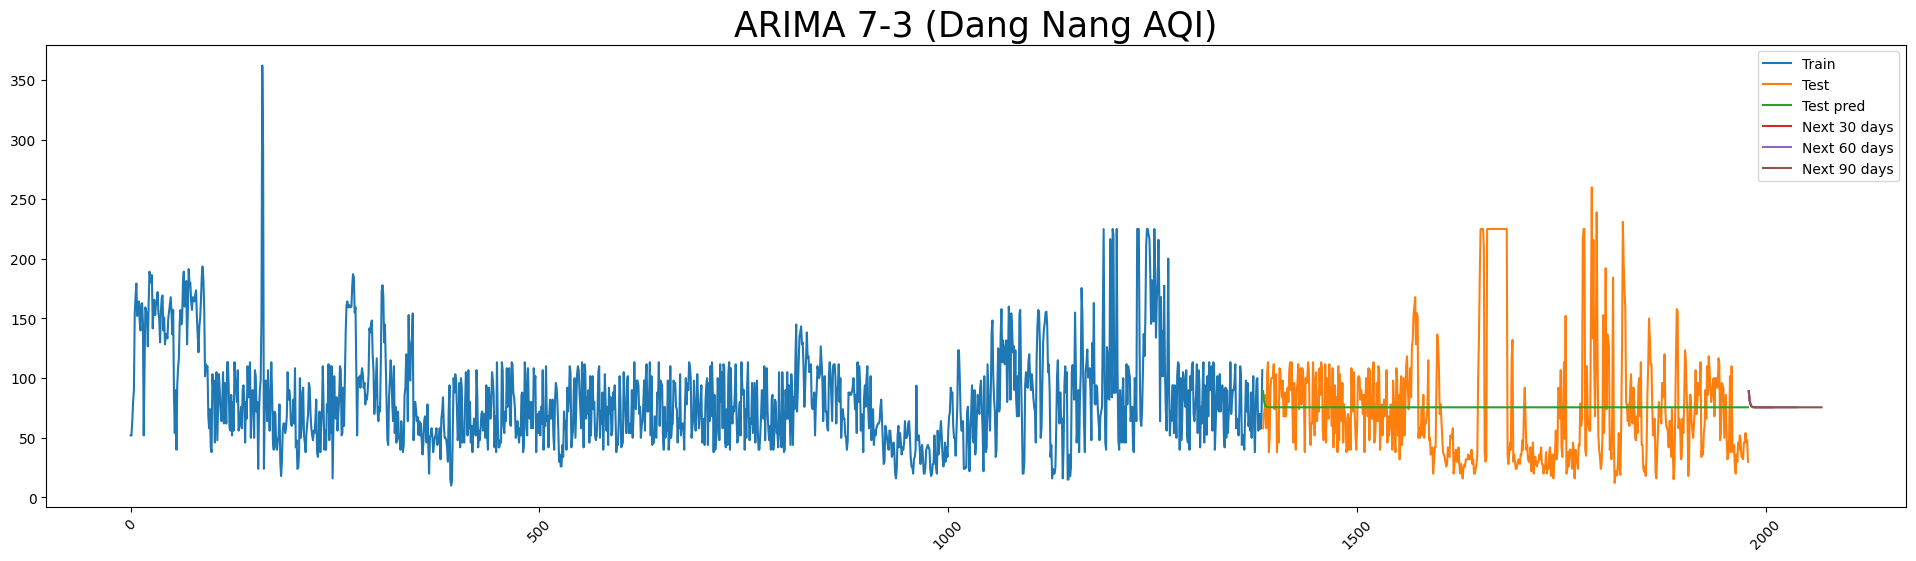

In [59]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 1, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 1, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])



plt.xticks(rotation=45)
plt.title('ARIMA 7-3 (Dang Nang AQI)', fontsize=25)
plt.show()

****Chia lai data thanh 8:1:1****

In [61]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 8:2
train_size = int(0.8*len(df))

train_data = df[:train_size]
test_data = df[train_size:]


In [62]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15146.088, Time=1.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15562.438, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15426.867, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15272.919, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15560.438, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15144.298, Time=2.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15158.410, Time=1.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15142.358, Time=1.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15144.313, Time=2.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15322.190, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=15140.398, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15270.919, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=15424.867, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=15142.351, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [63]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))

# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)
next_90days_pred = model.predict( n_periods=90)

In [64]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 106.04%
MAE: 49.15
RMSE: 60.44


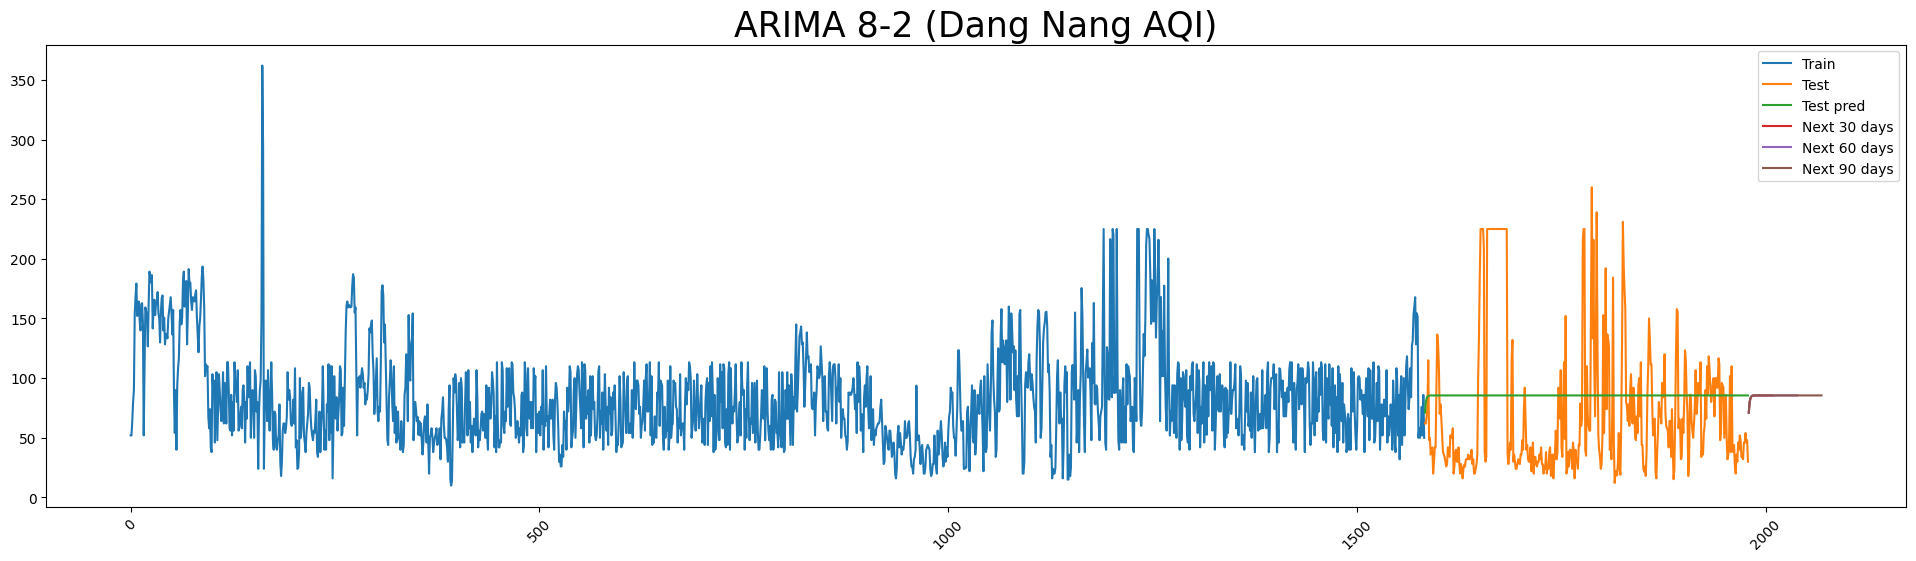

In [65]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 1, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 1, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 8-2 (Dang Nang AQI)', fontsize=25)

plt.show()

**Chia lai du lieu thanh 6:2:2**


In [66]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 9:1
train_size = int(0.9 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]


In [67]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17191.435, Time=4.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17550.036, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17428.639, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17324.162, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17548.036, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17189.459, Time=2.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17209.870, Time=0.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17187.857, Time=0.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17189.478, Time=1.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=17344.204, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=17185.861, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=17322.163, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=17426.639, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=17187.481, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [68]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)
next_90days_pred = model.predict( n_periods=90)

In [69]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 75.74%
MAE: 35.38
RMSE: 44.75


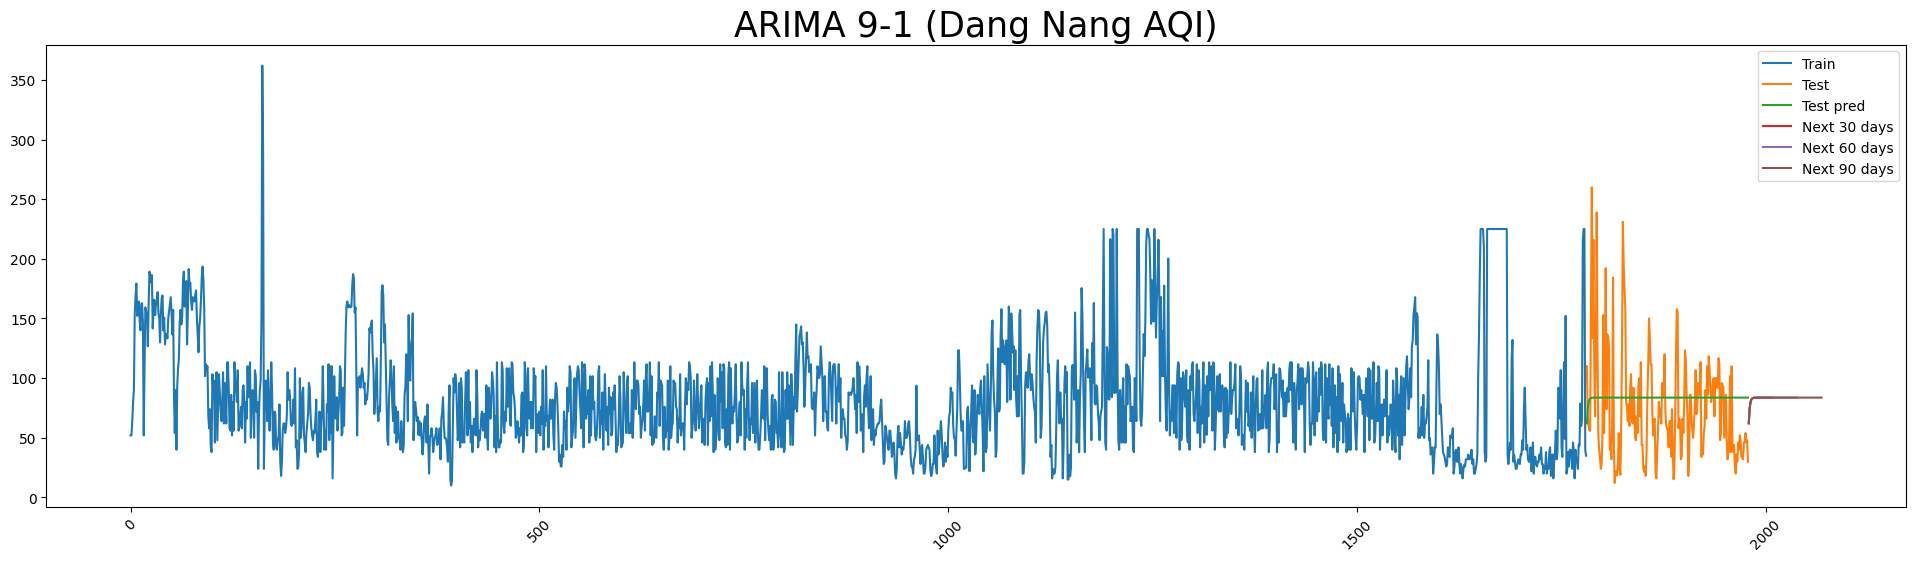

In [70]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 1, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 1, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 9-1 (Dang Nang AQI)', fontsize=25)

plt.show()

**Du doan cho du lieu Ha Noi**

In [71]:
# Lay du lieu
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_HaNoi_Updated.csv')
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df = df.reset_index()


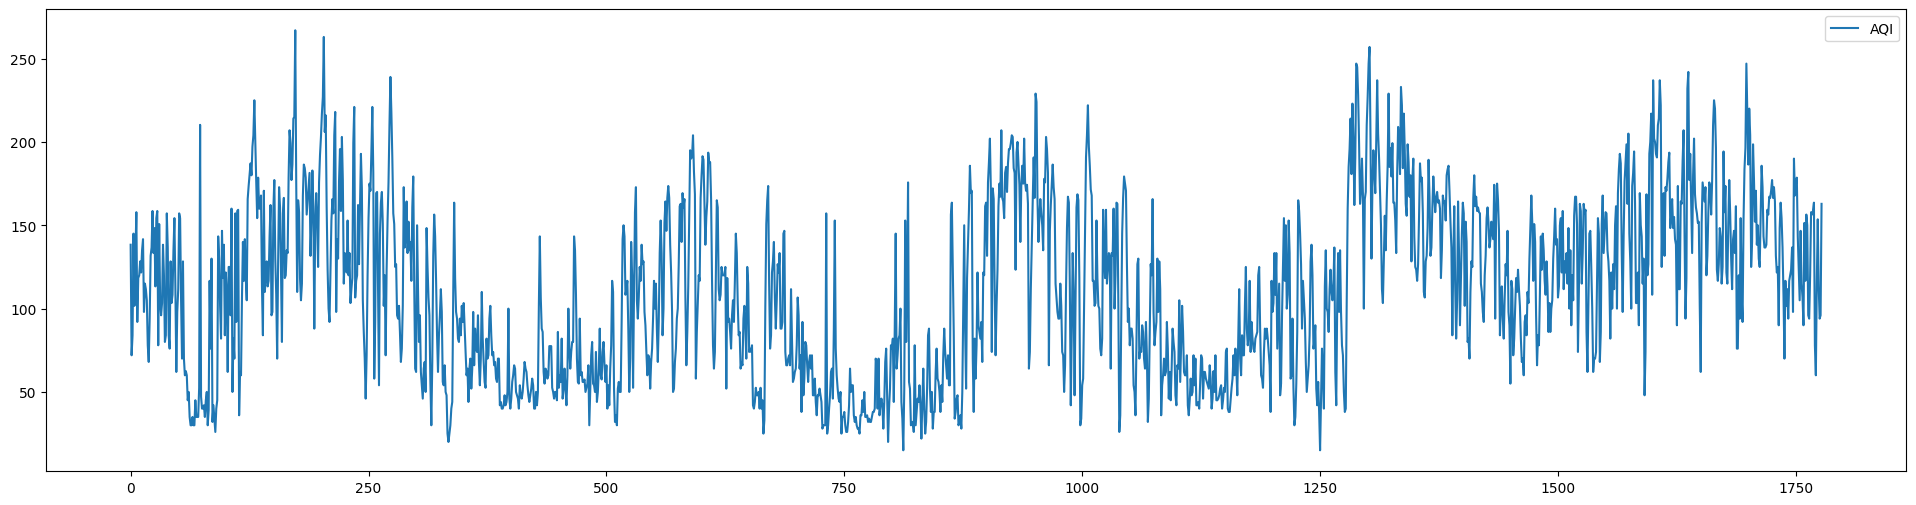

In [72]:
plt.figure(figsize=(24, 6))
plt.plot(df.index, df['AQI'])
plt.legend(['AQI'])
plt.show()

Chia du lieu thanh 7:2:1

In [73]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 7:3
train_size = int(0.7 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]



In [74]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11916.378, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12132.000, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12115.537, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12099.913, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12130.003, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11914.458, Time=1.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11966.259, Time=1.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11926.514, Time=1.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11916.424, Time=2.42 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11925.642, Time=0.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11914.426, Time=0.85 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12061.581, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11916.403, Time=1.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=12037.284, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [75]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)
next_90days_pred = model.predict( n_periods=90)

In [76]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 35.87%
MAE: 52.89
RMSE: 63.33


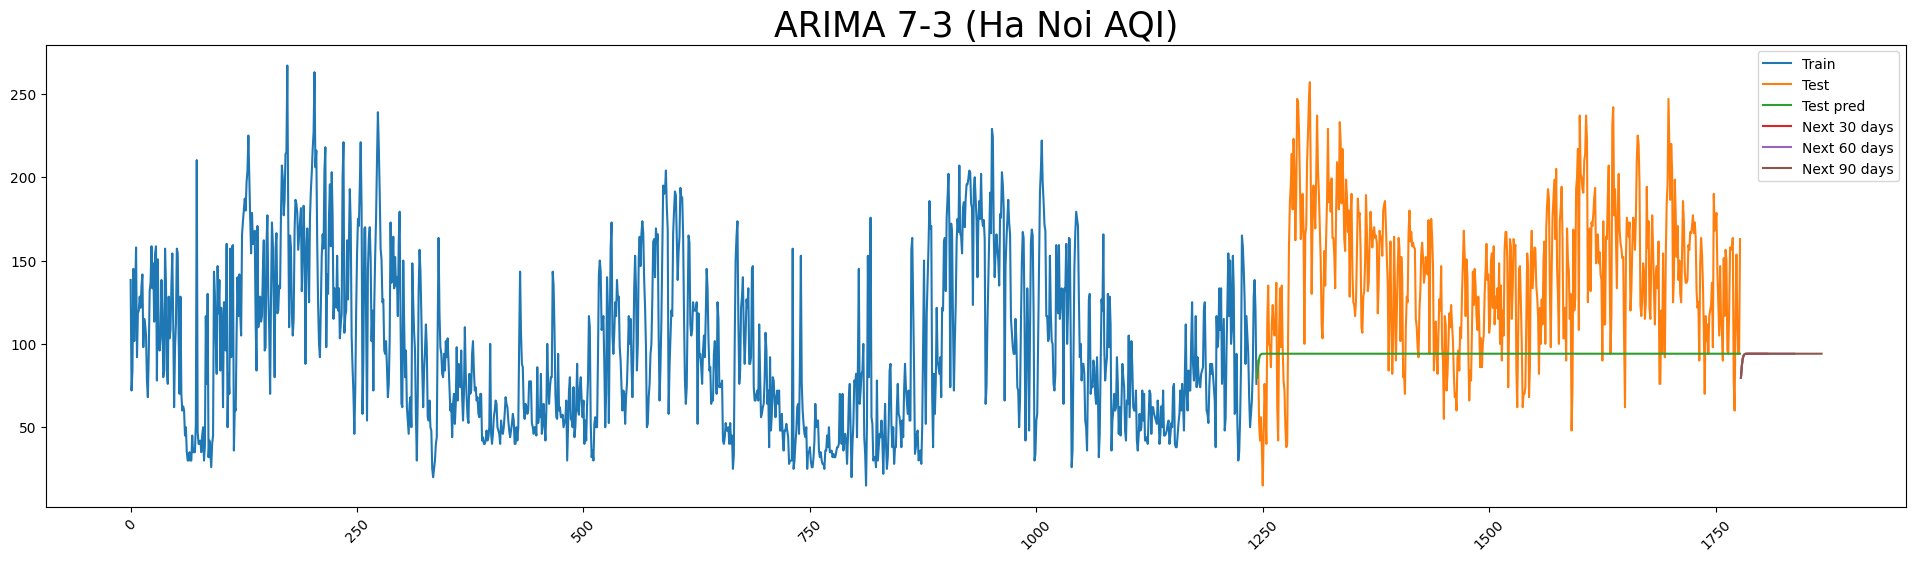

In [77]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 1, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 1, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 7-3 (Ha Noi AQI)', fontsize=25)

plt.show()

Chia du lieu thanh 8:1:1

In [78]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 8:2
train_size = int(0.8 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]


In [79]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13611.087, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13846.442, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13831.243, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13815.818, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13844.443, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13609.329, Time=0.95 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13667.901, Time=0.95 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13626.147, Time=1.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13611.195, Time=1.50 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13624.060, Time=0.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13610.497, Time=0.92 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13607.157, Time=5.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13610.684, Time=5.21 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=13613.745, Time=3.37 sec
 ARIMA(1,1,4)(0,0,0

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [80]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)
next_90days_pred = model.predict( n_periods=90)

In [81]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 25.17%
MAE: 31.76
RMSE: 38.96


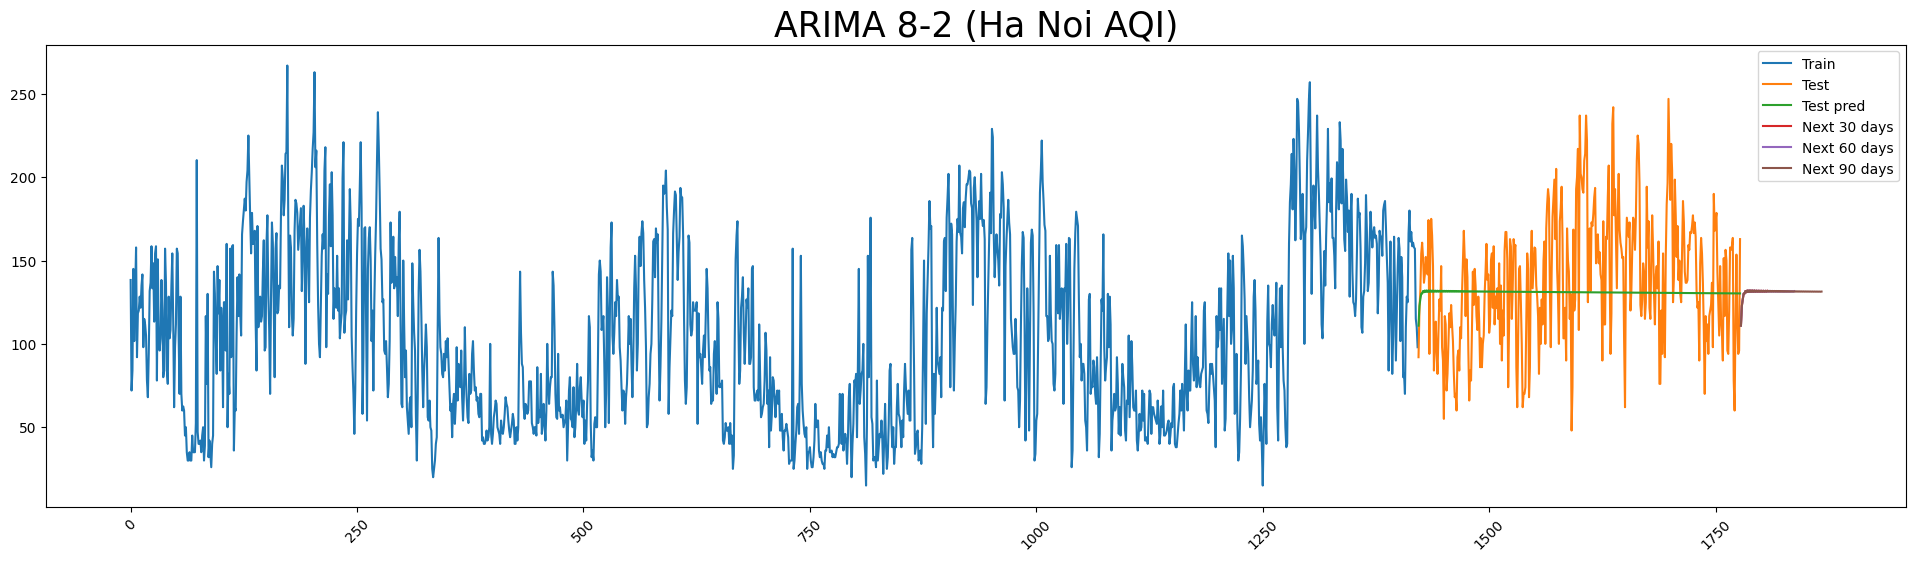

In [82]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 1, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 1, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 8-2 (Ha Noi AQI)', fontsize=25)

plt.show()

Chia du lieu thanh 6:2:2

In [83]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 9:1
train_size = int(0.9 * len(df))
# test_size = int(0.2 * len(df))
# val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:]
# val_data = df[train_size+test_size:]

In [84]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15320.161, Time=2.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15596.183, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15575.745, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15555.765, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15594.184, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15318.180, Time=1.78 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15383.901, Time=0.66 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15335.418, Time=0.71 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15320.166, Time=1.85 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15331.007, Time=1.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15318.524, Time=1.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15321.787, Time=2.36 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=15316.191, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=15381.908, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [85]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)
next_90days_pred = model.predict( n_periods=90)

In [86]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 22.60%
MAE: 32.40
RMSE: 40.24


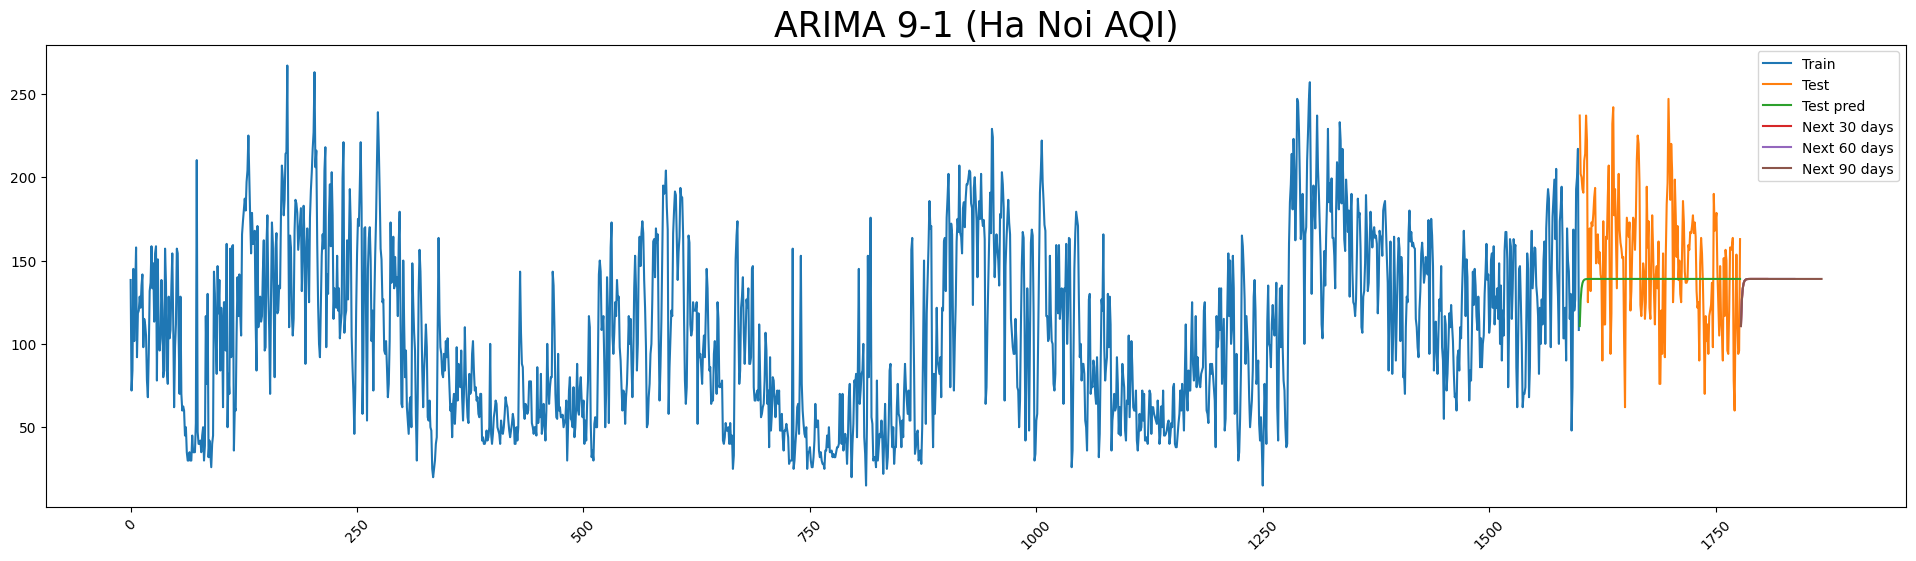

In [87]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 1, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 1, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 9-1 (Ha Noi AQI)', fontsize=25)

plt.show()

**Du doan cho du lieu Viet Tri**

In [88]:
# Lay du lieu
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_VietTri_Updated.csv')
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
# df = df.sort_values(by='date')
df = df.sort_values(by='date')
df = df.reset_index()


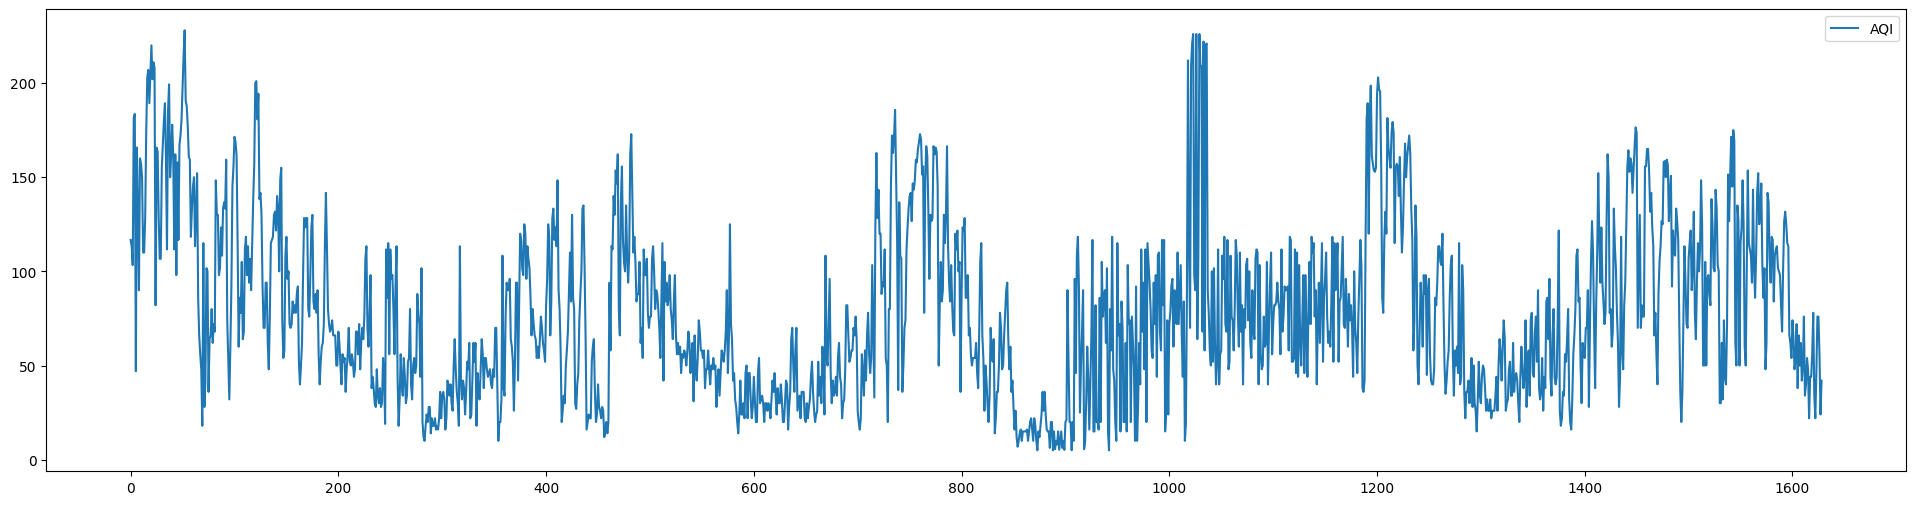

In [89]:
plt.figure(figsize=(24, 6))
plt.plot(df.index, df['AQI'])
plt.legend(['AQI'])
plt.show()

Chia du lieu 7:2:1

In [90]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]



In [91]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10902.255, Time=1.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11189.994, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11038.418, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10949.284, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11187.994, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10900.727, Time=1.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10929.073, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10914.468, Time=0.56 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10902.165, Time=1.72 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10919.582, Time=0.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10905.012, Time=0.94 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10904.274, Time=4.45 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=10898.844, Time=0.70 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=10927.080, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [92]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))

# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)
next_90days_pred = model.predict( n_periods=90)

In [93]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 63.29%
MAE: 36.99
RMSE: 43.64


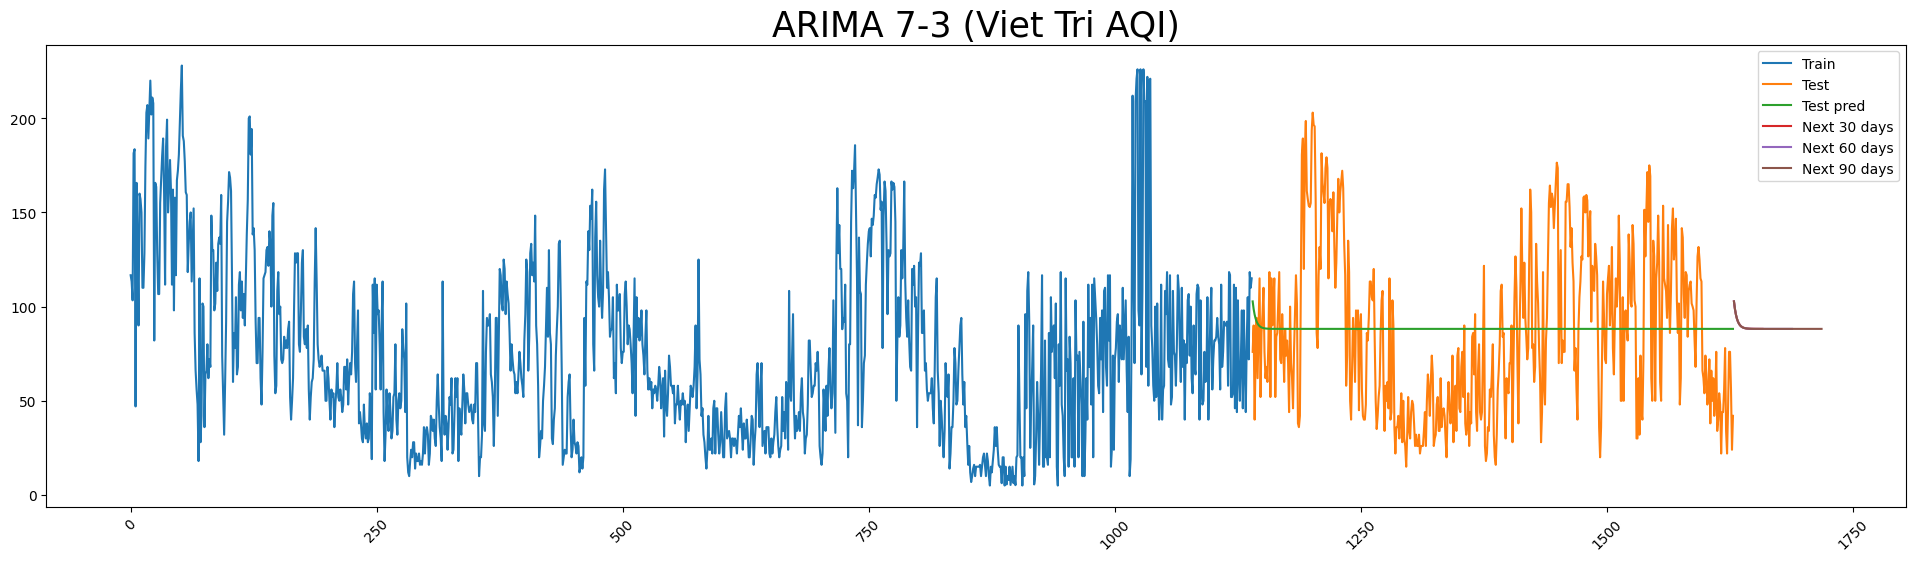

In [94]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 1, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 1, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 7-3 (Viet Tri AQI)', fontsize=25)

plt.show()

Chia du lieu 8:1:1

In [95]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 8:2
train_size = int(0.8 * len(df))



train_data = df[:train_size]
test_data = df[train_size:]



In [96]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12455.459, Time=2.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12763.223, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12610.291, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12513.047, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12761.226, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12454.589, Time=1.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12481.053, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12463.222, Time=1.02 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12455.234, Time=3.83 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12469.947, Time=1.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12457.532, Time=1.00 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12458.544, Time=3.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=12452.842, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=12479.117, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [97]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))

# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)
next_90days_pred = model.predict( n_periods=90)

In [98]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 46.62%
MAE: 43.70
RMSE: 56.41


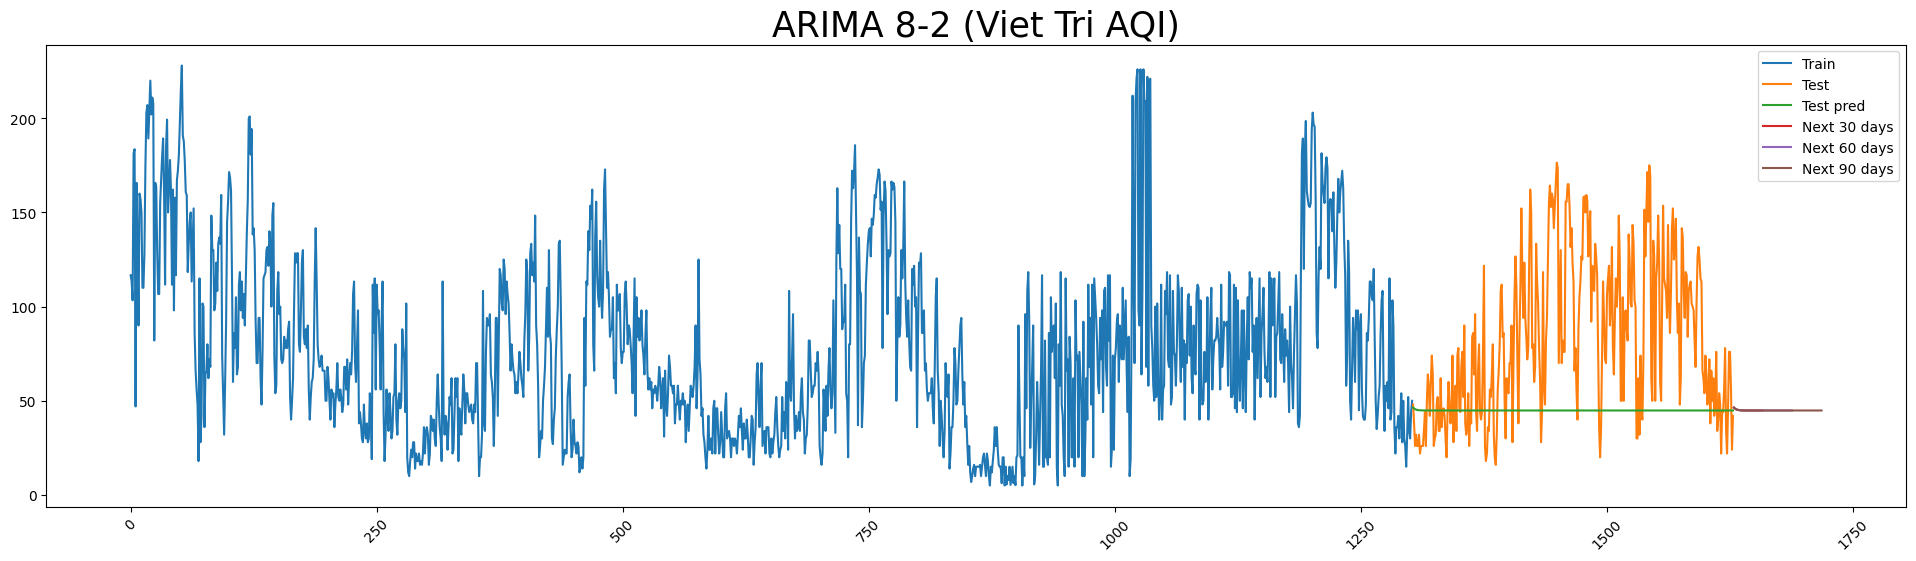

In [99]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 1, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 1, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 8-2 (Viet Tri AQI)', fontsize=25)

plt.show()

Chia du lieu thanh 6:2:2

In [100]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 9:1
train_size = int(0.9 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]


In [101]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13980.388, Time=5.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14314.671, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14160.728, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14056.468, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14312.671, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13979.831, Time=1.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14009.797, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13985.491, Time=0.71 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13980.051, Time=2.01 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13995.265, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13981.661, Time=1.01 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13983.827, Time=1.66 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=13977.834, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=14007.798, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [102]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)
next_90days_pred = model.predict( n_periods=90)

In [103]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 77.21%
MAE: 41.47
RMSE: 51.18


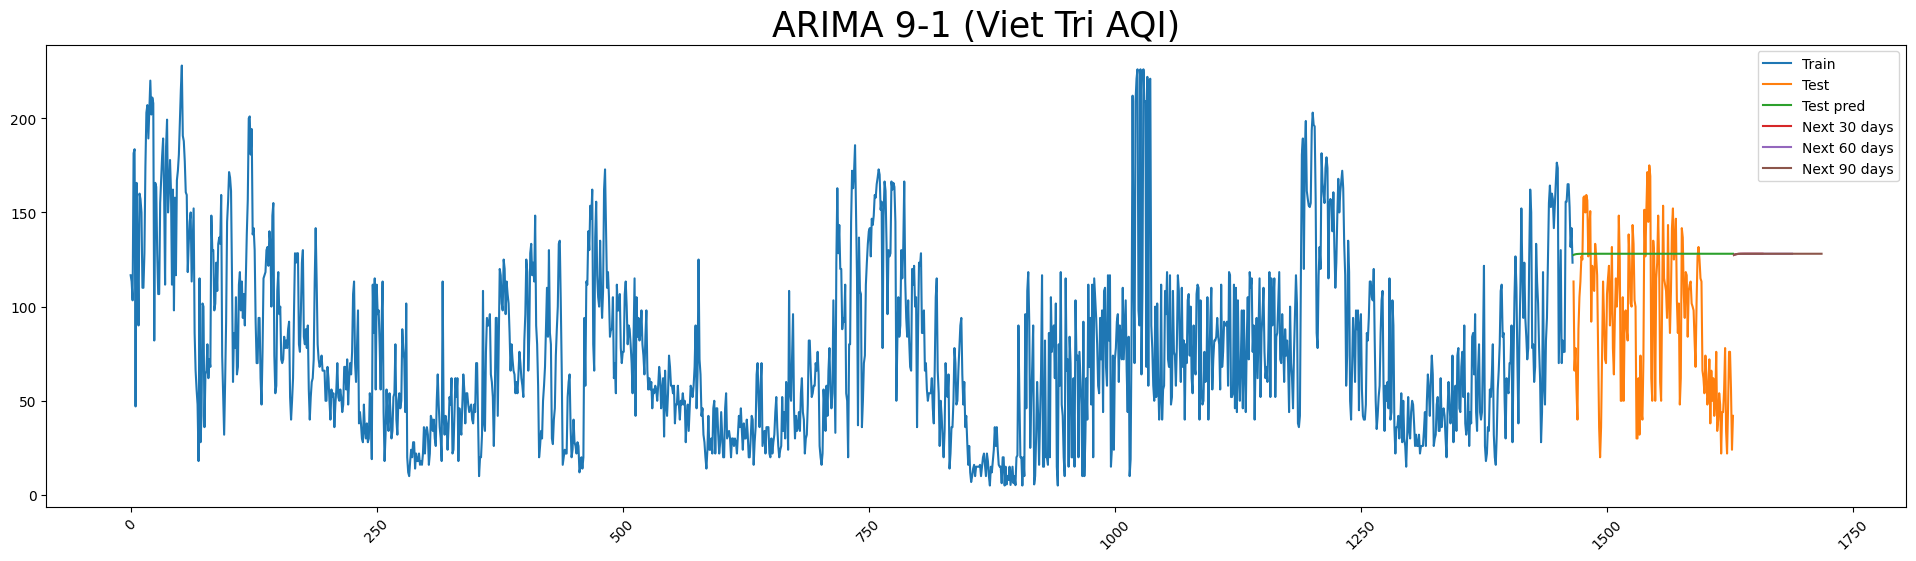

In [104]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 1, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 1, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 9-1 (Viet Tri AQI)', fontsize=25)

plt.show()